## Black and White

In [1]:
IMAGES_PATH = 'images_conv'

def load_image(image_path):
    """
    Load the image using opencv
    :param image_path: <String> Path of input_image
    :return a numpy array of size [image_height, image_width]
    """
    # Create the Image directory to save any plots
    if not os.path.exists(IMAGES_PATH):
        os.makedirs(IMAGES_PATH)
    coloured_image = cv2.imread(image_path)
    grey_image = cv2.cvtColor(coloured_image, cv2.COLOR_BGR2GRAY)
    print('image matrix size: ', grey_image.shape)
    print('\n First 5 columns and rows of the image matrix: \n', grey_image[:5, :5])
    # cv2.imwrite('TopLeft5x5.jpg', grey_image[:5, :5])
    return grey_image


def convolve2d(image, kernel):
    """
    This function which takes an image and a kernel and returns the convolution of them.

    :param image: a numpy array of size [image_height, image_width].
    :param kernel: a numpy array of size [kernel_height, kernel_width].
    :return: a numpy array of size [image_height, image_width] (convolution output).
    """
    # Flip the kernel
    kernel = np.flipud(np.fliplr(kernel))
    # convolution output
    output = np.zeros_like(image)

    # Add zero padding to the input image
    image_padded = np.zeros((image.shape[0] + 2, image.shape[1] + 2))
    image_padded[1:-1, 1:-1] = image

    # Loop over every pixel of the image
    for x in range(image.shape[1]):
        for y in range(image.shape[0]):
            # element-wise multiplication of the kernel and the image
            output[y, x] = (kernel * image_padded[y: y+3, x: x+3]).sum()

    return output

In [3]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
import cv2

In [5]:
import os
import cv2
import numpy as np


In [10]:
input_image = load_image("michael.jpg")



# kernel to be used to get sharpened image
KERNEL = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
image_sharpen = convolve2d(input_image, kernel=KERNEL)
cv2.imwrite(IMAGES_PATH + 'sharpened_almaty.jpg', image_sharpen)

image matrix size:  (640, 640)

 First 5 columns and rows of the image matrix: 
 [[11 11 11 11 11]
 [11 11 11 11 11]
 [10 10 10 10 10]
 [10 10 10 10 10]
 [10 10 10 10 10]]


True

In [9]:
from google.colab import files

uploaded = files.upload()  # появится кнопка "Выбрать файлы"


Saving michael.jpg to michael.jpg


array([[ 33,  22,  22, ...,  25,  27,  34],
       [ 23,  12,  12, ...,  11,  13,  27],
       [ 19,   9,   9, ...,  16,  11,  25],
       ...,
       [104,  56,  53, ...,   8,   3,   9],
       [109,  54,  53, ...,   3,   5,  10],
       [162, 108, 108, ...,  10,  10,  15]], dtype=uint8)
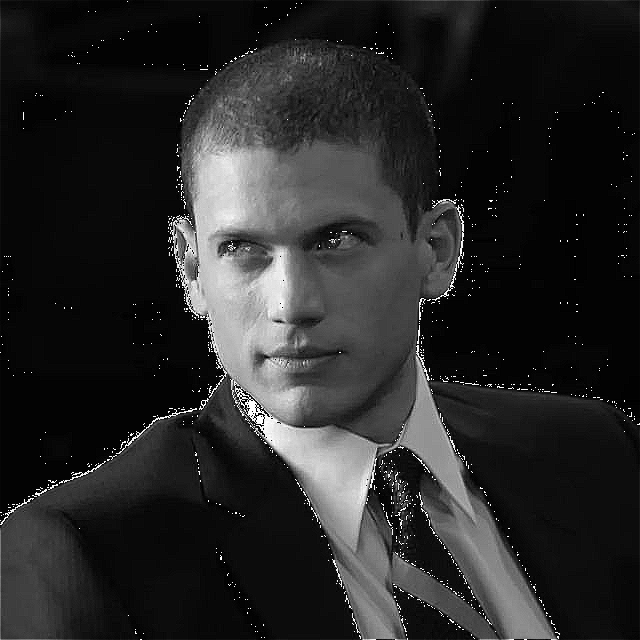

In [11]:
image_sharpen

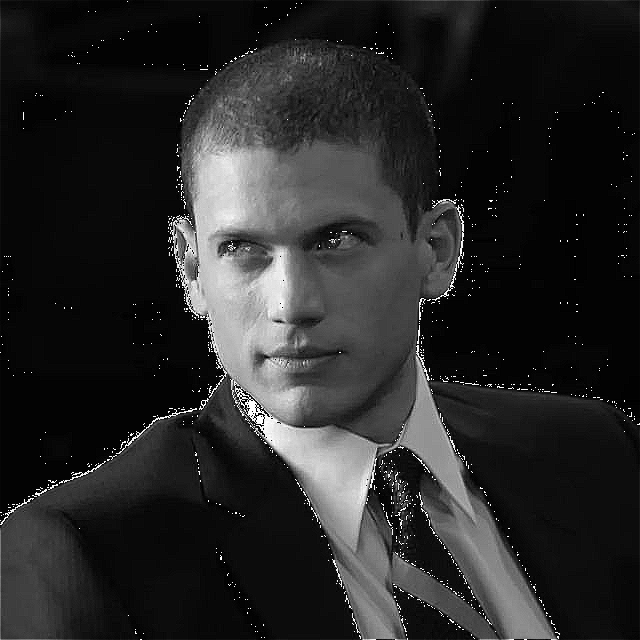

In [12]:
from google.colab.patches import cv2_imshow

cv2_imshow(image_sharpen)


In [13]:
import matplotlib.pyplot as plt

In [14]:
def save_and_show(input_image, output_image, KERNEL):
    if input_image is None:
        print("Ошибка загрузки изображения!")
    else:
        # Kernel для повышения резкости
        # KERNEL = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
        image_sharpen = convolve2d(input_image, KERNEL)
        image_sharpen = np.clip(image_sharpen, 0, 255).astype(np.uint8)

        # Отображение изображений
        fig, axes = plt.subplots(1, 2, figsize=(12, 6))

        axes[0].imshow(input_image, cmap='gray')
        axes[0].set_title('Original Image')
        axes[0].axis('off')

        axes[1].imshow(image_sharpen, cmap='gray')
        axes[1].set_title('Sharpened Image')
        axes[1].axis('off')

        plt.tight_layout()
        plt.show()

        # Сохранение
        cv2.imwrite(f'images_conv/{output_image}.jpg', image_sharpen)
        print("Изображение сохранено!")

In [15]:
np.array([[1, 2, 1], [2, 4, 2], [1, 2, 1]])/ 16

array([[0.0625, 0.125 , 0.0625],
       [0.125 , 0.25  , 0.125 ],
       [0.0625, 0.125 , 0.0625]])

image matrix size:  (640, 640)

 First 5 columns and rows of the image matrix: 
 [[11 11 11 11 11]
 [11 11 11 11 11]
 [10 10 10 10 10]
 [10 10 10 10 10]
 [10 10 10 10 10]]


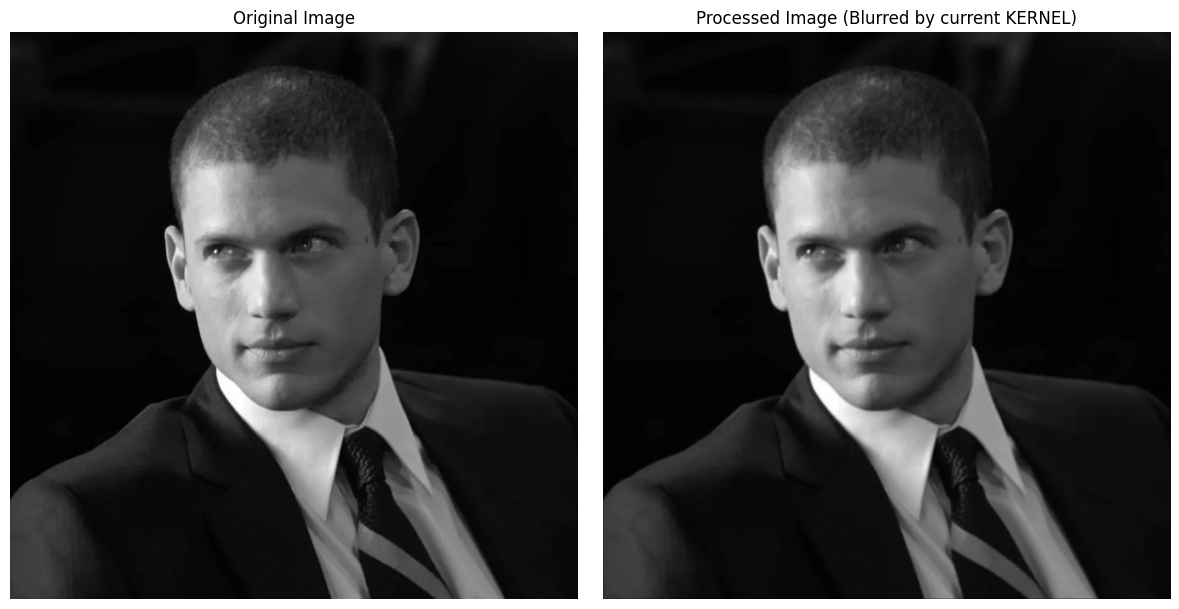

Image saved as cr7after.jpg!


In [17]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 # Assuming cv2 is needed by load_image and for imwrite

input_image = load_image("michael.jpg")


# Define the blurring kernel (as in the original call)
BLUR_KERNEL = np.array([[0.0625, 0.125 , 0.0625], [0.125 , 0.25  , 0.125 ], [0.0625, 0.125 , 0.0625]])

# Apply the convolution for sharpening (or blurring, based on the KERNEL used here)
# Reusing the convolve2d function as defined in convolve_images_11.py
image_processed = convolve2d(input_image, kernel=BLUR_KERNEL)
image_processed = np.clip(image_processed, 0, 255).astype(np.uint8)

# Display the images
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].imshow(input_image, cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(image_processed, cmap='gray')
axes[1].set_title('Processed Image (Blurred by current KERNEL)')
axes[1].axis('off')

plt.tight_layout()
plt.show()

# Save the processed image
cv2.imwrite('images_conv/cr7after.jpg', image_processed)
print("Image saved as cr7after.jpg!")

In [18]:

input_image = load_image("michael.jpg")


# kernel to be used to get sharpened image
KERNEL = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
image_sharpen = convolve2d(input_image, kernel=KERNEL)
cv2.imwrite(IMAGES_PATH + 'sharpencr7.jpg', image_sharpen)


image matrix size:  (640, 640)

 First 5 columns and rows of the image matrix: 
 [[11 11 11 11 11]
 [11 11 11 11 11]
 [10 10 10 10 10]
 [10 10 10 10 10]
 [10 10 10 10 10]]


True

In [19]:
import cv2

class BlacknWhite(object):
    """BlacknWhite Filter
        A class that applies BlacknWhite filter to an image.
        The class uses downsampling, bilateral filter and upsampling to create
        a BlacknWhite filter.
    """
    def __init__(self):
        pass
    def resize(self,image, window_height = 500):
        aspect_ratio = float(image.shape[1])/float(image.shape[0])
        window_width = window_height/aspect_ratio
        image = cv2.resize(image, (int(window_height),int(window_width)))
        return image

    def render(self, img_rgb):
        img_rgb = cv2.imread(img_rgb)
        img_rgb = self.resize(img_rgb,500)
        numDownSamples = 2       # number of downscaling steps
        numBilateralFilters = 50  # number of bilateral filtering steps
        # -- STEP 1 --
        # downsample image using Gaussian pyramid
        img_color = img_rgb
        for _ in range(numDownSamples):
            img_color = cv2.pyrDown(img_color)
        #cv2.imshow("downcolor",img_color)
        #cv2.waitKey(0)
        # repeatedly apply small bilateral filter instead of applying
        # one large filter
        for _ in range(numBilateralFilters):
            img_color = cv2.bilateralFilter(img_color, 9, 9, 7)
        #cv2.imshow("bilateral filter",img_color)
        #cv2.waitKey(0)
        # upsample image to original size
        for _ in range(numDownSamples):
            img_color = cv2.pyrUp(img_color)
        #cv2.imshow("upscaling",img_color)
        #cv2.waitKey(0)
        # -- STEPS 2 and 3 --
        # convert to grayscale and apply median blur
        img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)
        return img_gray
    def start(self, img_path, image, new_image):
        tmp_canvas =BlacknWhite() #make a temporary object
        file_name = img_path #File_name will come here
        res = tmp_canvas.render(image)
        cv2.imwrite(f"{new_image}", res)
        # cv2.imshow(f"{image}", res)
        # cv2.waitKey(0)
        # cv2.destroyAllWindows()
        # print(f"Image saved as {new_image}")
        return 0

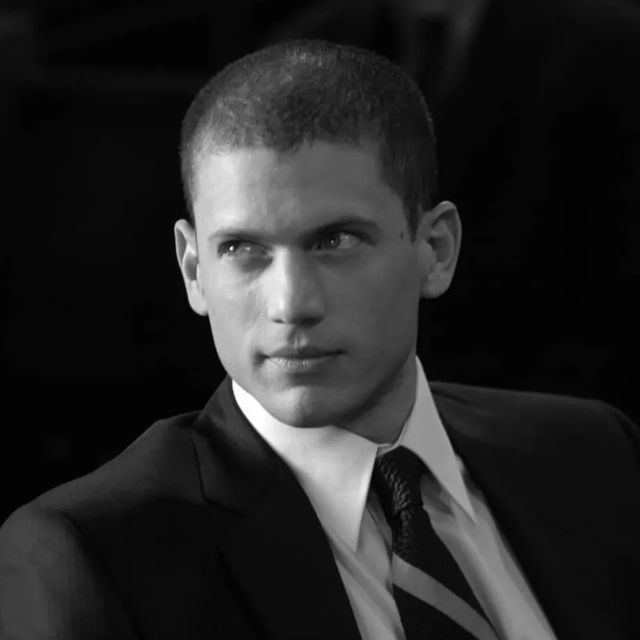

In [20]:
from google.colab.patches import cv2_imshow
import cv2


img_path = ("michael.jpg")
img_rgb = cv2.imread(img_path)

if img_rgb is None:
    print("Файл не найден:", img_path)
else:
    img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
    cv2_imshow(img_gray)


In [21]:
filter_img = BlacknWhite()

In [22]:
import os
img_path = os.getcwd()

In [23]:
filter_img.start(img_path = img_path, image = 'michael.jpg' , new_image = 'scofield_bw.jpg')

0

In [24]:
img_rgb = cv2.imread("michael.jpg")
img_rgb[0][0].shape

(3,)

In [25]:
img_rgb = cv2.imread("michael.jpg")
#img_rgb[0].shape
#img_rgb = img_rgb.resize(img_rgb,500)
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)

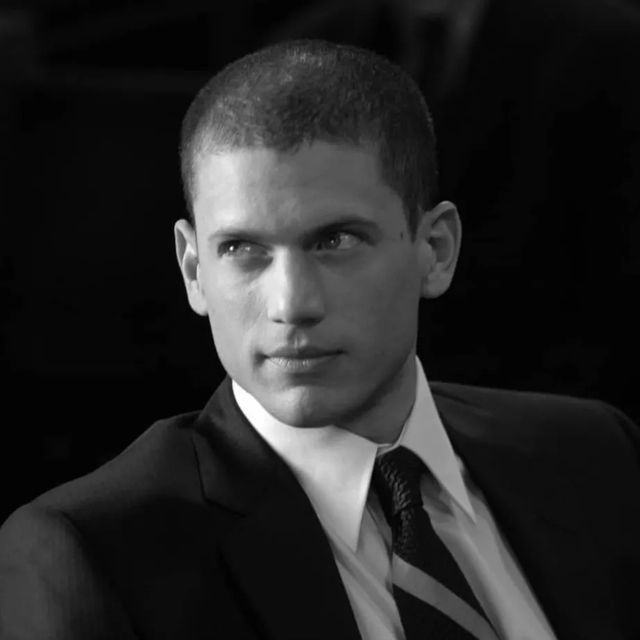

In [26]:
from google.colab.patches import cv2_imshow
cv2_imshow(img_gray)

## SHARPENING

In [27]:
import cv2
import numpy as np

class sharpening:
    """sharpening filter ---
        This class will apply sharpening filter to an image
        by applying a defined kernel values to the image.
    """
    def __init__(self):
        pass

    def resize(self,image,window_height = 500):
        aspect_ratio = float(image.shape[1])/float(image.shape[0])
        window_width = window_height/aspect_ratio
        image = cv2.resize(image, (int(window_height),int(window_width)))
        return image

    def sharp(self,image):
        # Create sharpening kernel
        kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
        #kernel = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
        kernel = np.array([[-2, 0, -1], [-1, 1, 1], [0, 1, 2]])

        # applying the sharpening kernel to the input image & displaying it.
        sharpened = cv2.filter2D(image, -1, kernel)
        # Noise reduction
        sharpened = cv2.bilateralFilter(sharpened, 9, 75, 75)
        return sharpened

    def start(self, img_path, new_image):
        # Create an image object
        image = cv2.imread(img_path)
        image = self.resize(image, 500)
        tmp_canvas = sharpening()
        res = tmp_canvas.sharp(image)
        cv2.imwrite(new_image, res)
        # cv2.imshow('original',image)
        # cv2.imshow('sharp',res)

        # print(f'Image saved as {new_image}')
        # cv2.waitKey(0)
        # cv2.destroyAllWindows()

In [ ]:
filter_sharp = sharpening()

In [30]:
# Пример определения
class filter_sharp:
    @staticmethod
    def start(img_path, new_image):
        import cv2
        img = cv2.imread(img_path)
        kernel = np.array([[0, -1, 0],
                           [-1, 5,-1],
                           [0, -1, 0]])
        sharpened = cv2.filter2D(img, -1, kernel)
        cv2.imwrite(new_image, sharpened)


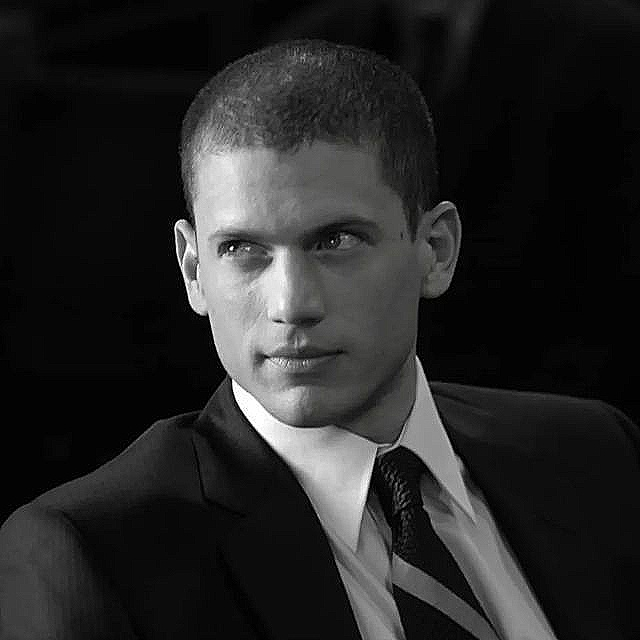

Image saved as michael_sharp.jpg


In [32]:
from google.colab.patches import cv2_imshow
import cv2

filter_sharp.start(img_path = 'michael.jpg', new_image = 'michael_sharp.jpg')

# Load and display the sharpened image
sharpened_image = cv2.imread('michael_sharp.jpg')
cv2_imshow(sharpened_image)
print("Image saved as michael_sharp.jpg")

## CARTOONIZER

In [33]:

class Cartoonizer(object):
    """Cartoonizer effect
        A class that applies a cartoon effect to an image.
        The class uses a bilateral filter and adaptive thresholding to create
        a cartoon effect.
    """
    def __init__(self):
        pass

    def resize(self,image,window_height = 500):
        aspect_ratio = float(image.shape[1])/float(image.shape[0])
        window_width = window_height/aspect_ratio
        image = cv2.resize(image, (int(window_height),int(window_width)))
        return image
    def render(self, img_rgb):
        img_rgb = cv2.imread(img_rgb)
        img_rgb = self.resize(img_rgb, 500)
        numDownSamples = 2       # number of downscaling steps
        numBilateralFilters = 50  # number of bilateral filtering steps
        # -- STEP 1 --
        # downsample image using Gaussian pyramid
        img_color = img_rgb
        for _ in range(numDownSamples):
            img_color = cv2.pyrDown(img_color)
        #cv2.imshow("downcolor",img_color)
        #cv2.waitKey(0)
        # repeatedly apply small bilateral filter instead of applying
        # one large filter
        for _ in range(numBilateralFilters):
            img_color = cv2.bilateralFilter(img_color, 9, 9, 7)
        #cv2.imshow("bilateral filter",img_color)
        #cv2.waitKey(0)
        # upsample image to original size
        for _ in range(numDownSamples):
            img_color = cv2.pyrUp(img_color)
        #cv2.imshow("upscaling",img_color)
        #cv2.waitKey(0)
        # -- STEPS 2 and 3 --
        # convert to grayscale and apply median blur
        img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)
        img_blur = cv2.medianBlur(img_gray, 3)
        #cv2.imshow("grayscale+median blur",img_color)
        #cv2.waitKey(0)
        # -- STEP 4 --
        # detect and enhance edges
        img_edge = cv2.adaptiveThreshold(img_blur, 255,
                                         cv2.ADAPTIVE_THRESH_MEAN_C,
                                         cv2.THRESH_BINARY,9, 2)
        #cv2.imshow("edge",img_edge)
        #cv2.waitKey(0)
        # -- STEP 5 --
        # convert back to color so that it can be bit-ANDed with color image
        (x,y,z) = img_color.shape
        img_edge = cv2.resize(img_edge,(y,x))
        img_edge = cv2.cvtColor(img_edge, cv2.COLOR_GRAY2RGB)
        #cv2.imwrite("edge.png",img_edge)
        #cv2.imshow("step 5", img_edge)
        #cv2.waitKey(0)
        #img_edge = cv2.resize(img_edge,(i for i in img_color.shape[:2]))
        #print img_edge.shape, img_color.shape
        return cv2.bitwise_and(img_color, img_edge)
    def start(self, img_path, image, new_image):
        tmp_canvas = Cartoonizer() #make a temporary object
        file_name = img_path #File_name will come here
        res = tmp_canvas.render(image)
        cv2.imwrite(new_image, res)
        # cv2.imshow("Cartoon version", res)
        # cv2.waitKey(0)
        # cv2.destroyAllWindows()
        # print(f"Image saved as '{new_image}'")

In [35]:
cartoon_filter = Cartoonizer()

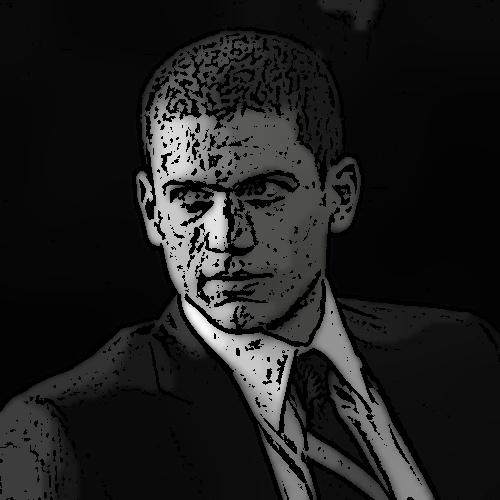

In [36]:
from google.colab.patches import cv2_imshow
import cv2

cartoon_filter.start(img_path = img_path, image = 'michael.jpg', new_image = 'michael_cartoon.jpg' )


cartoon_image = cv2.imread('michael_cartoon.jpg')
cv2_imshow(cartoon_image)

## Negative filtering

In [37]:


# find max GSV
def findMax(k):
    mx = 0
    for i in k:
        if i>mx:
            mx = i
    return mx

class Negative(object):

    def __init__(self):
        pass
    def resize(self,image,window_height = 500):
        aspect_ratio = float(image.shape[1])/float(image.shape[0])
        window_width = window_height/aspect_ratio
        image = cv2.resize(image, (int(window_height),int(window_width)))
        return image

    def render(self, img_rgb):
        img_gray = cv2.imread(img_rgb, 0)
        img_gray = self.resize(img_gray, 500)
        #get all image values
        k = []
        for i in range(img_gray.shape[0]):
            for j in range(img_gray.shape[1]):
                k.append(img_gray[i,j])
        L = findMax(k) #max GSV
        dst = img_gray[:] #copy image
        #update dst
        for i in range(img_gray.shape[0]):
          for j in range(img_gray.shape[1]):
            dst[i,j] = L - dst[i,j]
        return dst
    def start(self, img_path, image, new_image):
        tmp_canvas = Negative() #make a temporary object
        file_name = img_path #File_name will come here
        res = tmp_canvas.render(image)
        cv2.imwrite(new_image, res)
        cv2.imshow("Negative Version", res)
        cv2.waitKey(0)
        cv2.destroyAllWindows()
        print("Image saved as {new_image}")


In [38]:
negative_filter = Negative()

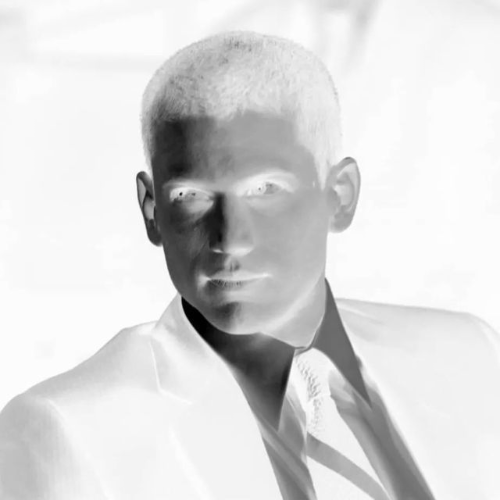

Image saved as michael_negative.jpg


In [39]:
from google.colab.patches import cv2_imshow

res = negative_filter.render('michael.jpg')
cv2.imwrite('michael_negative.jpg', res)
cv2_imshow(res)
print("Image saved as michael_negative.jpg")

## OLD FILTER

In [40]:
import numpy as np
import argparse
import random
import os, sys

class old_filter(object):
    """old_filter effect
        A class that applies a random old filter effect to an image
        using a set of pre-designed filters and applying Arithmetic
        Operations on Image to add the filter effect on it.
    """

    def __init__(self):
        pass

    #function to resize
    #according to the aspect ratio of the image
    def resize(self,image,window_height = 500):
        aspect_ratio = float(image.shape[1])/float(image.shape[0])
        window_width = window_height/aspect_ratio
        image = cv2.resize(image, (int(window_height),int(window_width)))
        return image
    #function that renders the image
    def render(self, img_rgb):
        img = cv2.imread(img_rgb,0)
        img = self.resize(img, 500)

        filtern = []
        filters = list(range(1,7))
        for l in filters:
            filtern.append(str(l) +'n')
        #filtern -> stores numbers (1-7) with preceeding n
        #filters -> all numbers (1-7) and elements of filtern
        filters.extend(filtern)

        #selects random filter everytime
        selectedfilter = str(random.choice(filters))
        #print(selectedfilter)
        #filter path in generalized form to work in all systems
        #filter_path = os.path.abspath(os.path.join('oldfilters','old' + selectedfilter + '.jpg'))
        filter_path = img_rgb
        if selectedfilter.endswith('n'):
            #selected file is an normal filter and Arithmetic addition
            #needs to be applied on it

            old = cv2.imread(filter_path,0)
            old = cv2.resize(old,(img.shape[1],img.shape[0]))
            #cv2.imshow('filter',old)
            #cv2.imshow('image',img)

            #Arithmetic add
            add=cv2.add(img,old)
            return add

        else:
            #selected file is an inverted filter and Weighted addition
            #needs to be applied on it

            old = cv2.imread(filter_path, 0)
            old = cv2.resize(old,(img.shape[1],img.shape[0]))
            #print old.shape
            #for i in range(old.shape[0]):
            #	 for j in range(old.shape[1]):
            #		if old[i][j]>200:
            #			old[i][j]=255
            #cv2.imshow('filter',old)
            #cv2.imshow('image',img)

            #Weightedadd
            add=cv2.addWeighted(img,0.7,old,0.3,0)
            return add

    def start(self, image, new_image):
        #make a temporary object
        tmp_canvas = old_filter()
        #File_name will come here
        res = tmp_canvas.render(image)
        cv2.imwrite(new_image, res)
        cv2.imshow("old version", res)
        cv2.waitKey(0)
        cv2.destroyAllWindows()
        print(f"Image saved as {new_image}")

In [46]:
old_filters = old_filter()

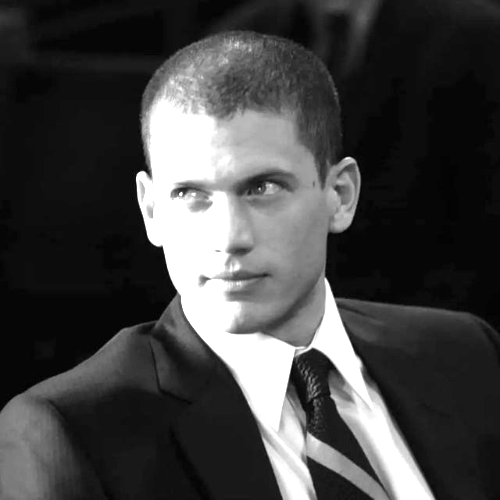

Image saved as michael_old.jpg


In [47]:
from google.colab.patches import cv2_imshow
import cv2

rendered_image = old_filters.render('michael.jpg')
cv2.imwrite('michael_old.jpg', rendered_image)

cv2_imshow(rendered_image)
print("Image saved as michael_old.jpg")